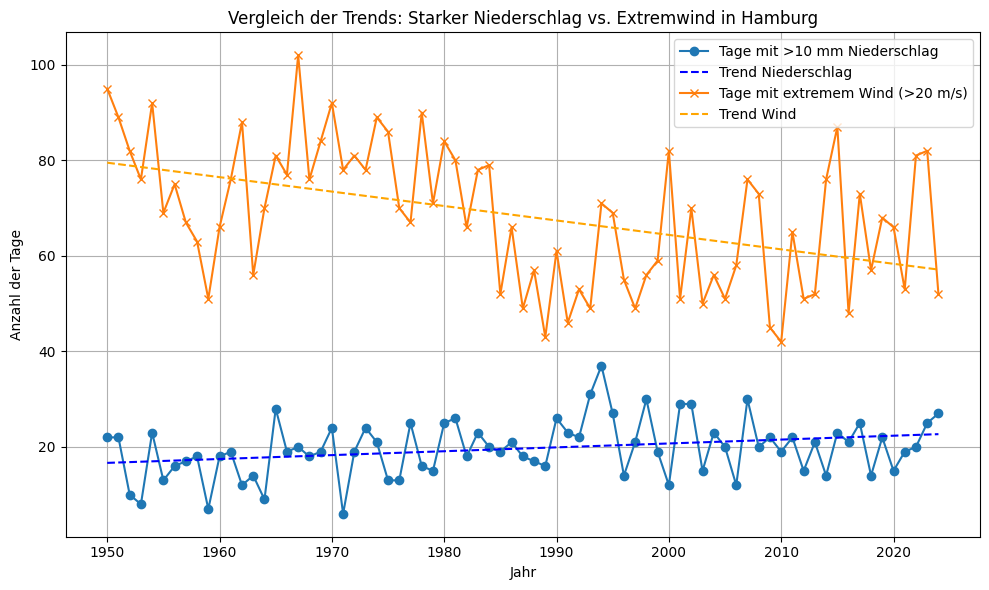

In [1]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Berechne die Tage mit starkem Niederschlag
    data['heavy_rain'] = data['prcp'] > 10
    
    # Berechne extreme Windtage
    extreme_wind_threshold = 20  # m/s
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold
    
    # Aggregiere die Anzahl der Tage pro Jahr
    yearly_heavy_rain = data.resample('Y').sum(numeric_only=True)['heavy_rain']
    yearly_extreme_wind = data.resample('Y').sum(numeric_only=True)['extreme_wind']

    # Lineare Regression für beide Ereignisse
    years = yearly_heavy_rain.index.year.values.reshape(-1, 1)
    
    lr_rain = LinearRegression()
    lr_rain.fit(years, yearly_heavy_rain)
    trend_line_rain = lr_rain.predict(years)
    
    lr_wind = LinearRegression()
    lr_wind.fit(years, yearly_extreme_wind)
    trend_line_wind = lr_wind.predict(years)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_heavy_rain.index.year, yearly_heavy_rain, label='Tage mit >10 mm Niederschlag', marker='o')
    plt.plot(yearly_heavy_rain.index.year, trend_line_rain, label='Trend Niederschlag', color='blue', linestyle='--')
    
    plt.plot(yearly_extreme_wind.index.year, yearly_extreme_wind, label='Tage mit extremem Wind (>20 m/s)', marker='x')
    plt.plot(yearly_extreme_wind.index.year, trend_line_wind, label='Trend Wind', color='orange', linestyle='--')
    
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.title('Vergleich der Trends: Starker Niederschlag vs. Extremwind in Hamburg')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

Pearson-Korrelation zwischen den Tagen mit starkem Niederschlag und extremem Wind: -0.01


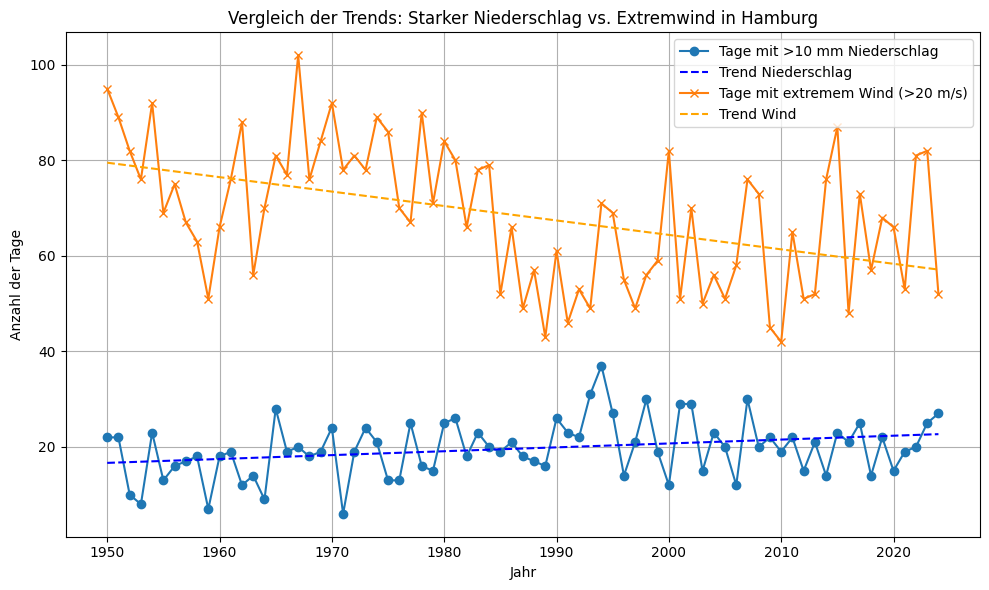

In [2]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Berechne die Tage mit starkem Niederschlag
    data['heavy_rain'] = data['prcp'] > 10
    
    # Berechne extreme Windtage
    extreme_wind_threshold = 20  # m/s
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold
    
    # Aggregiere die Anzahl der Tage pro Jahr
    yearly_heavy_rain = data.resample('Y').sum(numeric_only=True)['heavy_rain']
    yearly_extreme_wind = data.resample('Y').sum(numeric_only=True)['extreme_wind']

    # Berechne die Korrelation zwischen den beiden Datensätzen
    combined_data = pd.DataFrame({
        'heavy_rain': yearly_heavy_rain,
        'extreme_wind': yearly_extreme_wind
    })
    
    # Entferne NA-Werte, wenn sie existieren
    combined_data.dropna(inplace=True)
    
    correlation = combined_data['heavy_rain'].corr(combined_data['extreme_wind'])
    print(f"Pearson-Korrelation zwischen den Tagen mit starkem Niederschlag und extremem Wind: {correlation:.2f}")

    # Lineare Regression für beide Ereignisse
    years = yearly_heavy_rain.index.year.values.reshape(-1, 1)
    
    lr_rain = LinearRegression()
    lr_rain.fit(years, yearly_heavy_rain)
    trend_line_rain = lr_rain.predict(years)
    
    lr_wind = LinearRegression()
    lr_wind.fit(years, yearly_extreme_wind)
    trend_line_wind = lr_wind.predict(years)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_heavy_rain.index.year, yearly_heavy_rain, label='Tage mit >10 mm Niederschlag', marker='o')
    plt.plot(yearly_heavy_rain.index.year, trend_line_rain, label='Trend Niederschlag', color='blue', linestyle='--')
    
    plt.plot(yearly_extreme_wind.index.year, yearly_extreme_wind, label='Tage mit extremem Wind (>20 m/s)', marker='x')
    plt.plot(yearly_extreme_wind.index.year, trend_line_wind, label='Trend Wind', color='orange', linestyle='--')
    
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl der Tage')
    plt.title('Vergleich der Trends: Starker Niederschlag vs. Extremwind in Hamburg')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Pearson-Korrelation in Winter: 0.45
Pearson-Korrelation in Frühling: -0.05
Pearson-Korrelation in Sommer: 0.04
Pearson-Korrelation in Herbst: 0.13


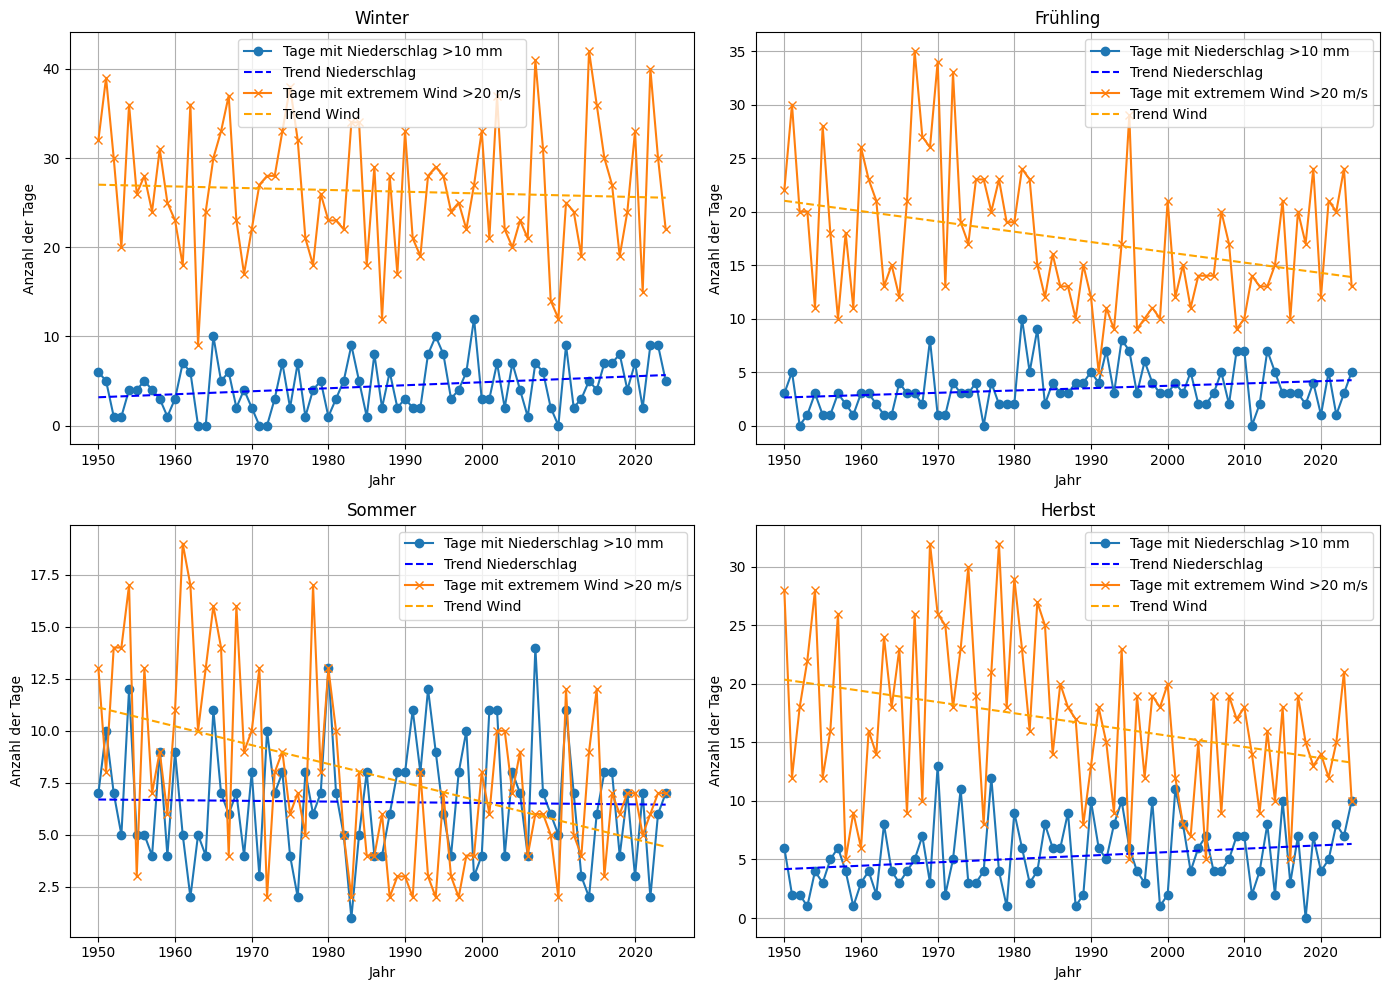

In [3]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Berechne die Tage mit starkem Niederschlag
    data['heavy_rain'] = data['prcp'] > 10
    
    # Berechne extreme Windtage
    extreme_wind_threshold = 20  # m/s
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold
    
    # Definiere die Jahreszeiten
    data['season'] = data.index.month % 12 // 3 + 1  # 1=Winter, 2=Frühling, 3=Sommer, 4=Herbst
    season_names = {1: 'Winter', 2: 'Frühling', 3: 'Sommer', 4: 'Herbst'}
    data['season_name'] = data['season'].map(season_names)

    # Aggregiere die Anzahl der Tage mit starkem Niederschlag und extremem Wind pro Jahr und Saison
    heavy_rain_days_per_season = data.groupby([data.index.year, 'season_name']).sum(numeric_only=True)['heavy_rain'].unstack()
    extreme_wind_days_per_season = data.groupby([data.index.year, 'season_name']).sum(numeric_only=True)['extreme_wind'].unstack()

    # Berechne die Korrelation pro Jahreszeit
    correlations = {}
    for season in season_names.values():
        # Erstellen Sie eine kombinierte DataFrame für die Saison
        combined_data = pd.DataFrame({
            'heavy_rain': heavy_rain_days_per_season[season],
            'extreme_wind': extreme_wind_days_per_season[season]
        }).dropna()  # Entferne NA-Werte

        # Berechne die Korrelation
        if not combined_data.empty:
            correlation = combined_data['heavy_rain'].corr(combined_data['extreme_wind'])
            correlations[season] = correlation
            print(f"Pearson-Korrelation in {season}: {correlation:.2f}")
        else:
            print(f"Keine Daten für Saison: {season}")

    # Optional: Plotting der Trends für jede Saison
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    for i, season in enumerate(season_names.values()):
        ax = axes[i // 2, i % 2]
        
        # Prepare data
        years = heavy_rain_days_per_season.index
        rain_data = heavy_rain_days_per_season[season].fillna(0)
        wind_data = extreme_wind_days_per_season[season].fillna(0)

        lr_rain = LinearRegression().fit(years.values.reshape(-1, 1), rain_data.values)
        trend_rain = lr_rain.predict(years.values.reshape(-1, 1))
        
        lr_wind = LinearRegression().fit(years.values.reshape(-1, 1), wind_data.values)
        trend_wind = lr_wind.predict(years.values.reshape(-1, 1))
        
        # Plot
        ax.plot(years, rain_data, marker='o', linestyle='-', label='Tage mit Niederschlag >10 mm')
        ax.plot(years, trend_rain, linestyle='--', color='blue', label='Trend Niederschlag')
        
        ax.plot(years, wind_data, marker='x', linestyle='-', label='Tage mit extremem Wind >20 m/s')
        ax.plot(years, trend_wind, linestyle='--', color='orange', label='Trend Wind')
        
        ax.set_title(f'{season}')
        ax.set_xlabel('Jahr')
        ax.set_ylabel('Anzahl der Tage')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

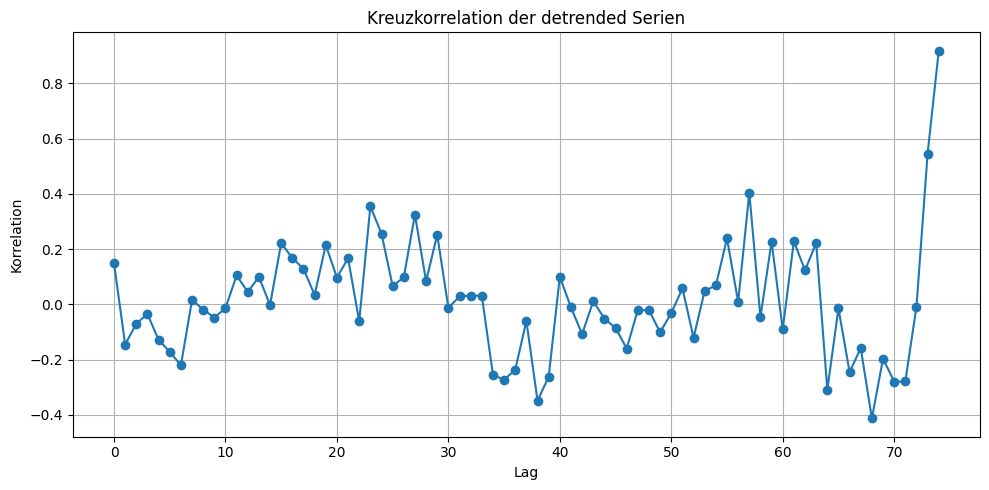

In [ ]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Funktion zum Entfernen des linearen Trends (Detrending) der Zeitreihe
def detrend(series):
    return series - LinearRegression().fit(np.arange(len(series)).reshape(-1, 1), series.values.reshape(-1, 1)).predict(np.arange(len(series)).reshape(-1, 1)).flatten()

# Detren die Daten
detrended_rain = detrend(heavy_rain_days_per_season.sum(axis=1).fillna(0))
detrended_wind = detrend(extreme_wind_days_per_season.sum(axis=1).fillna(0))

# Berechne die Kreuzkorrelation
cross_corr = ccf(detrended_rain, detrended_wind)

# Plotten der Kreuzkorrelation
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(cross_corr)), cross_corr, marker='o')
plt.title('Kreuzkorrelation der detrended Serien')
plt.xlabel('Lag')
plt.ylabel('Korrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

#Die Kreuzkorrelation misst, wie die Veränderungen in einer Zeitreihe mit einem bestimmten zeitlichen Versatz (Lag) gegenüber einer anderen Zeitreihe korrelieren. 
#Dabei wird berücksichtigt, dass eine dieser Zeitreihen um eine gewisse Anzahl von Zeitpunkten verschoben wird.

#In unserem Fall haben wir die Zeitreihen zunächst detrendet. 
#Detrending bedeutet, den langfristigen Trend aus den Daten zu entfernen, um sich auf kurzfristige Veränderungen oder Schwankungen zu konzentrieren. 
#Dies ist besonders nützlich, wenn wir zwei Zeitreihen vergleichen wollen, die unterschiedliche langfristige Trends haben, aber bei den kurzfristigen Schwankungen Korrelationsmuster aufweisen.



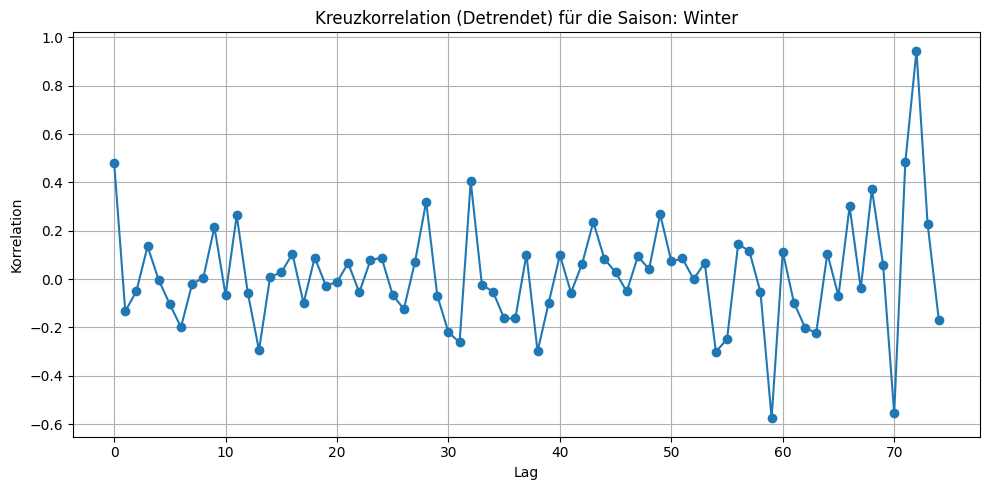

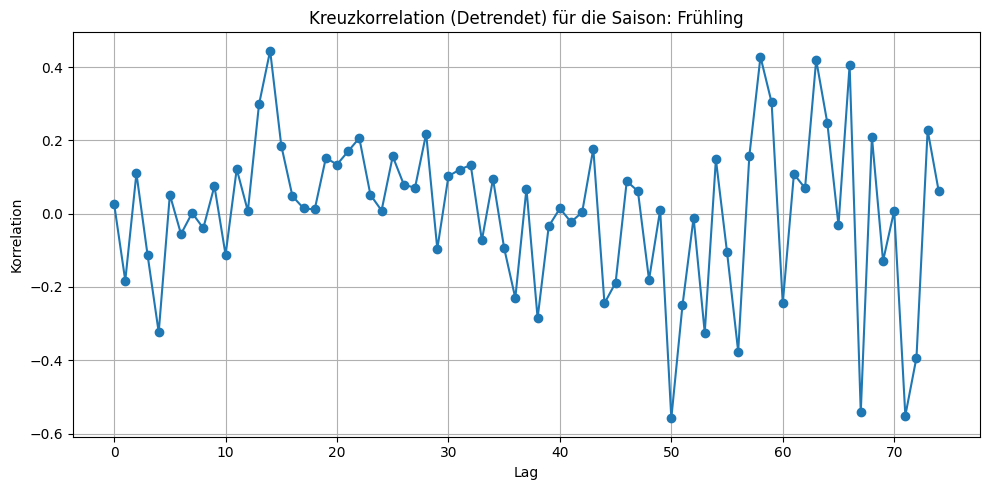

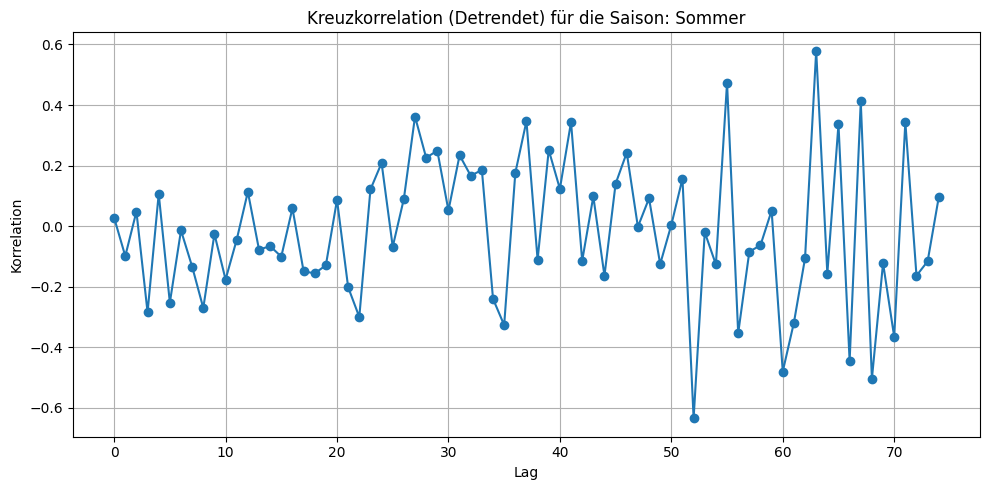

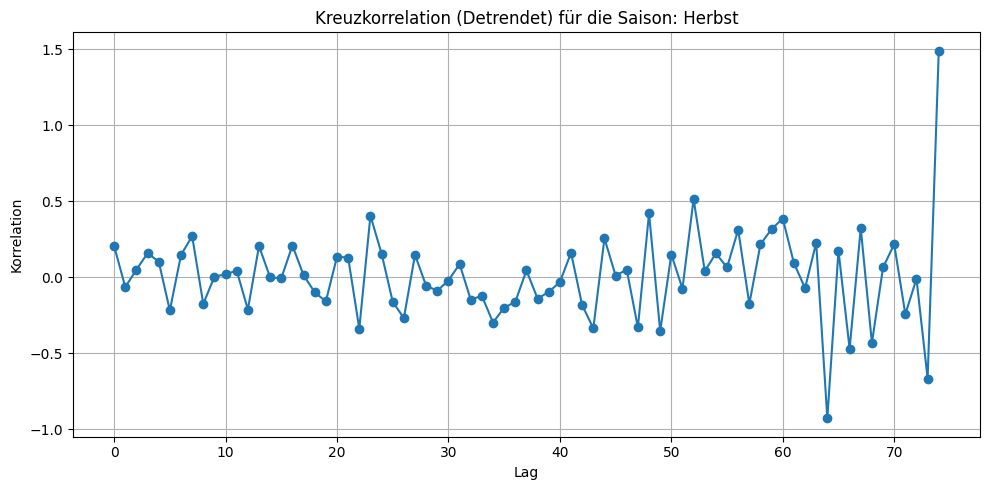

In [7]:
import pandas as pd
from meteostat import Daily, Point
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from statsmodels.tsa.stattools import ccf

# Funktion zum Entfernen des linearen Trends (Detrending) der Zeitreihe
def detrend(series):
    x = np.arange(len(series)).reshape(-1, 1)
    y = series.values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    trend = model.predict(x).flatten()
    return series - trend

# Definiere den Ort für Hamburg
hamburg = Point(53.5511, 9.9937)

# Definiere den Zeitraum von 1950 bis heute
start = pd.to_datetime('1950-01-01')
end = pd.to_datetime('today')

# Lese die täglichen Daten für Hamburg
data = Daily(hamburg, start, end)
data = data.fetch()

# Überprüfe, ob Daten verfügbar sind
if data.empty:
    print("Keine Daten für den angegebenen Zeitraum verfügbar.")
else:
    # Berechne die Tage mit starkem Niederschlag
    data['heavy_rain'] = data['prcp'] > 10
    
    # Berechne extreme Windtage
    extreme_wind_threshold = 20  # m/s
    data['extreme_wind'] = data['wspd'] > extreme_wind_threshold
    
    # Definiere die Jahreszeiten
    data['season'] = data.index.month % 12 // 3 + 1  # 1=Winter, 2=Frühling, 3=Sommer, 4=Herbst
    season_names = {1: 'Winter', 2: 'Frühling', 3: 'Sommer', 4: 'Herbst'}
    data['season_name'] = data['season'].map(season_names)

    # Aggregiere die Anzahl der Tage mit starkem Niederschlag und extremem Wind pro Jahr und Saison
    heavy_rain_days_per_season = data.groupby([data.index.year, 'season_name']).sum(numeric_only=True)['heavy_rain'].unstack()
    extreme_wind_days_per_season = data.groupby([data.index.year, 'season_name']).sum(numeric_only=True)['extreme_wind'].unstack()

    # Analyse der saisonalen Kreuzkorrelation
    for season in season_names.values():
        # Detren die Daten
        detrended_rain = detrend(heavy_rain_days_per_season[season].fillna(0))
        detrended_wind = detrend(extreme_wind_days_per_season[season].fillna(0))

        # Berechne die Kreuzkorrelation
        cross_corr = ccf(detrended_rain, detrended_wind)

        # Plot der Kreuzkorrelation
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(len(cross_corr)), cross_corr, marker='o')
        plt.title(f'Kreuzkorrelation (Detrendet) für die Saison: {season}')
        plt.xlabel('Lag')
        plt.ylabel('Korrelation')
        plt.grid(True)
        plt.tight_layout()
        plt.show()